<a href="https://colab.research.google.com/github/Nichenametla1432/drought-prediction/blob/main/DVA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
# Load your dataset
data = pd.read_csv('/content/customized_daily_rainfall_data.csv')
data.head(5)

,StationIndex,Station,Year,Month,Day,Rainfall
0,1,Dhaka,1970,1,1,0
1,1,Dhaka,1970,1,2,0
2,1,Dhaka,1970,1,3,0
3,1,Dhaka,1970,1,4,0
4,1,Dhaka,1970,1,5,0


In [ ]:
# Features and target variable
X = data[['Station','Year', 'Month', 'Day']]
y = data['Rainfall']

In [ ]:
# Encode categorical features (Station)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_stations = encoder.fit_transform(X[['Station']])
encoded_stations_df = pd.DataFrame(encoded_stations, columns=encoder.get_feature_names_out(['Station']))
X = pd.concat([X, encoded_stations_df], axis=1)
X = X.drop('Station', axis=1)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predict and evaluate
predictions = model.predict(X_test)

In [ ]:
print(predictions)

[10.21 32.75  6.37 ...  0.07  0.    0.  ]


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(y_pred)

Mean Squared Error: 292.3044462692209
[10.21 32.75  6.37 ...  0.07  0.    0.  ]


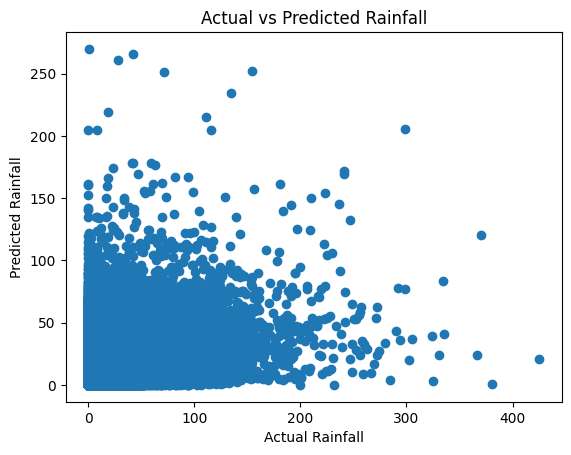

In [ ]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.show()

In [ ]:
# Create a DataFrame with actual and predicted rainfall for each station
results_df = pd.DataFrame({'Actual Rainfall': y_test, 'Predicted Rainfall': y_pred})
print(results_df)

        Actual Rainfall  Predicted Rainfall
403064                0               10.21
490430               60               32.75
340516                0                6.37
509589                0                0.00
44452                 5               42.09
...                 ...                 ...
36936                14                1.70
360507                0                0.00
179374                0                0.07
445276                0                0.00
495942                0                0.00

[108476 rows x 2 columns]


In [ ]:
# Get the corresponding 'Station' values from the original data
# X_test.index gives you the indices of the original data corresponding to the test set
results_df['Station'] = data.loc[X_test.index, 'Station'].values
print(results_df['Station'])

403064       Comilla
490430     Rangamati
340516    Patuakhali
509589       Sandwip
44452     Mymensingh
             ...    
36936     Mymensingh
360507        Teknaf
179374       Rangpur
445276        Hatiya
495942     Rangamati
Name: Station, Length: 108476, dtype: object


In [ ]:
# Analyze the results to identify areas with high and low rainfall predictions
# Group by station and calculate average predicted rainfall
predicted_rainfall_by_station = results_df.groupby('Station')['Predicted Rainfall'].mean()
print(predicted_rainfall_by_station)

Station
Ambagan_ctg     8.122615
Barisal         5.362496
Bhola           5.823649
Bogra           4.646493
Chandpur        5.030361
Chittagong      8.140644
Comilla         5.234284
CoxsBazar       9.797160
Dhaka           5.192756
Dinajpur        5.402189
Faridpur        4.725220
Feni            7.213949
Hatiya          8.960677
Ishurdi         3.950746
Jessore         4.263312
Khepupara       7.390987
Khulna          4.563061
Kutubdia        7.763778
M.court         8.440048
Madaripur       4.431022
Mongla          4.812421
Mymensingh      5.444220
Patuakhali      6.933951
Rajshahi        3.727859
Rangamati       6.773279
Rangpur         6.283158
Sandwip         9.869903
Satkhira        4.375009
Sitakunda       8.190569
Srimangal       6.022888
Sylhet         11.849047
Tangail         4.945532
Teknaf         12.525825
chuadanga       3.862273
sydpur          5.472926
Name: Predicted Rainfall, dtype: float64


In [ ]:
# Find stations with the highest and lowest predicted rainfall
highest_rainfall_stations = predicted_rainfall_by_station.nlargest(5)
lowest_rainfall_stations = predicted_rainfall_by_station.nsmallest(5)

print("\nStations with Highest Predicted Rainfall:")
print(highest_rainfall_stations)

print("\nStations with Lowest Predicted Rainfall:")
print(lowest_rainfall_stations)



Stations with Highest Predicted Rainfall:
Station
Teknaf       12.525825
Sylhet       11.849047
Sandwip       9.869903
CoxsBazar     9.797160
Hatiya        8.960677
Name: Predicted Rainfall, dtype: float64

Stations with Lowest Predicted Rainfall:
Station
Rajshahi     3.727859
chuadanga    3.862273
Ishurdi      3.950746
Jessore      4.263312
Satkhira     4.375009
Name: Predicted Rainfall, dtype: float64


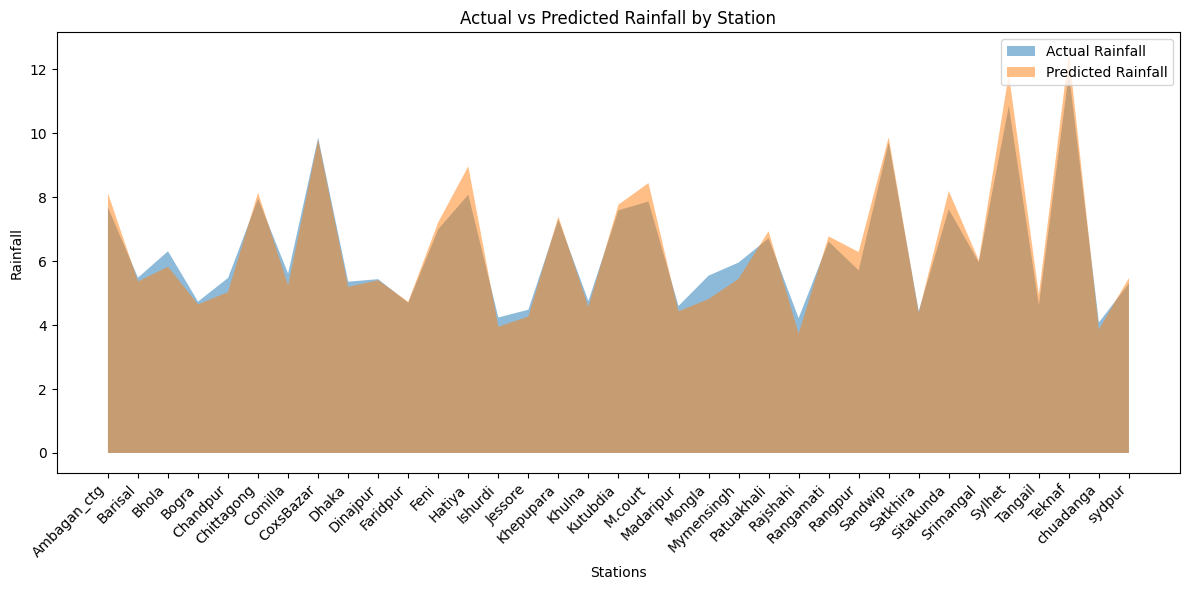

In [ ]:
# Assuming results_df is your DataFrame with 'Actual Rainfall', 'Predicted Rainfall', and 'Station'
# Group by station and get the mean actual and predicted rainfall
station_actual_predicted = results_df.groupby('Station').agg({'Actual Rainfall': 'mean', 'Predicted Rainfall': 'mean'})

# Create a area chart
plt.figure(figsize=(12, 6))
plt.fill_between(station_actual_predicted.index, 0, station_actual_predicted['Actual Rainfall'], label='Actual Rainfall', alpha=0.5)
plt.fill_between(station_actual_predicted.index, station_actual_predicted['Predicted Rainfall'], label='Predicted Rainfall', alpha=0.5)
plt.xlabel('Stations')
plt.ylabel('Rainfall')
plt.title('Actual vs Predicted Rainfall by Station')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from scipy.optimize import linprog
import numpy as np

In [ ]:
# Load your dataset
data = pd.read_csv('/content/dva-goal-2-data.csv')
data.head(5)

,Sl.no,water needed,evaporation,Rain_forecast
0,1,50,45,0
1,2,55,50,0
2,3,58,53,0
3,4,59,54,0
4,5,60,52,0


In [ ]:
import pandas as pd
def irrigation_scheduler(df):

    df['water_deficit'] = df['water needed'] - df['Rain_forecast']

    threshold = 30
    df['irrigation'] = df['water_deficit'] > threshold

    return df

data = irrigation_scheduler(data)


print(data[['Sl.no', 'water needed', 'evaporation', 'Rain_forecast', 'water_deficit', 'irrigation']])

    Sl.no  water needed  evaporation  Rain_forecast  water_deficit  irrigation
0       1            50           45              0             50        True
1       2            55           50              0             55        True
2       3            58           53              0             58        True
3       4            59           54              0             59        True
4       5            60           52              0             60        True
5       6            45           35              0             45        True
6       7            48           41              0             48        True
7       8            75           60              0             75        True
8       9            62           58              0             62        True
9      10            63           53              0             63        True
10     11            65           54              0             65        True
11     12            58           48              0 